In [154]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from python_speech_features import mfcc

In [159]:
path='C:/Users/kesav/OneDrive/Desktop/Academics/speech signal processing/Assignment-2/H_MKB.wav'
data,fs=librosa.load(path,sr=8000)

[-0.00017283 -0.00031575 -0.00020811 ... -0.00016546 -0.00025455
  0.        ]

[-0.00017283 -0.00031575 -0.00020811 ... -0.00016546 -0.00025455
  0.        ]


In [160]:
#Framing
def frame(x,winsize,hoplength,fs,wintype):
    frames = []
    winSam = int(fs*winsize)    # No. of samples in window
    hopSam = int(fs*hoplength)  # Frame shift size
    step = winSam - hopSam       # Frame size
    
    
    numOfFrames = min ( int( (len(x) - winSam) // hopSam) + 1 , len(x)//winSam) 
    
    if wintype == 'hamm':
        window = np.hamming(winSam)
    
    # print(step)
    frames.append( x[0:winSam]*window ) # For first frame only
    
    for i in range(1, numOfFrames):
        startIndx = i*winSam - step
        endIndx = startIndx + winSam
        frames.append( x[startIndx:endIndx]*window )     # Appending frames to the frames
    
    return frames, numOfFrames

winsize = 20/1000    
hoplength = 10/1000     
  
frames, numOfFrames = frame(data,winsize,hoplength,fs, 'hamm') 

In [161]:
#Calculating LP coefficients
final=[]
for i in range(numOfFrames):
    temp= librosa.lpc(frames[i], order=8)
    h= np.hstack([[0], -1 * temp[1:]])
    y_hat1=scipy.signal.lfilter(h, [1], frames[i])
    final.extend(y_hat1)

In [162]:
#padding zeros
paddingLength=len(y)-len(final)
final=np.pad(final,(0,paddingLength),mode='constant')

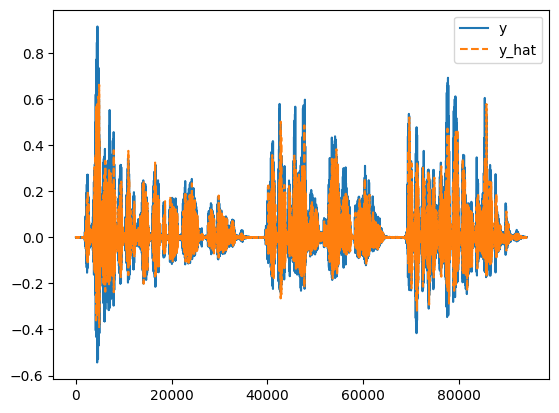

In [163]:
fig, ax = plt.subplots()
ax.plot(y)
ax.plot(final, linestyle='--')
ax.legend(['original', 'synthesized'])

In [164]:
#LP residual
e=np.subtract(y,final)

In [166]:
#MFCC on LP residual
MF=mfcc(e,fs,numcep=13,nfilt=26, preemph=0.97)

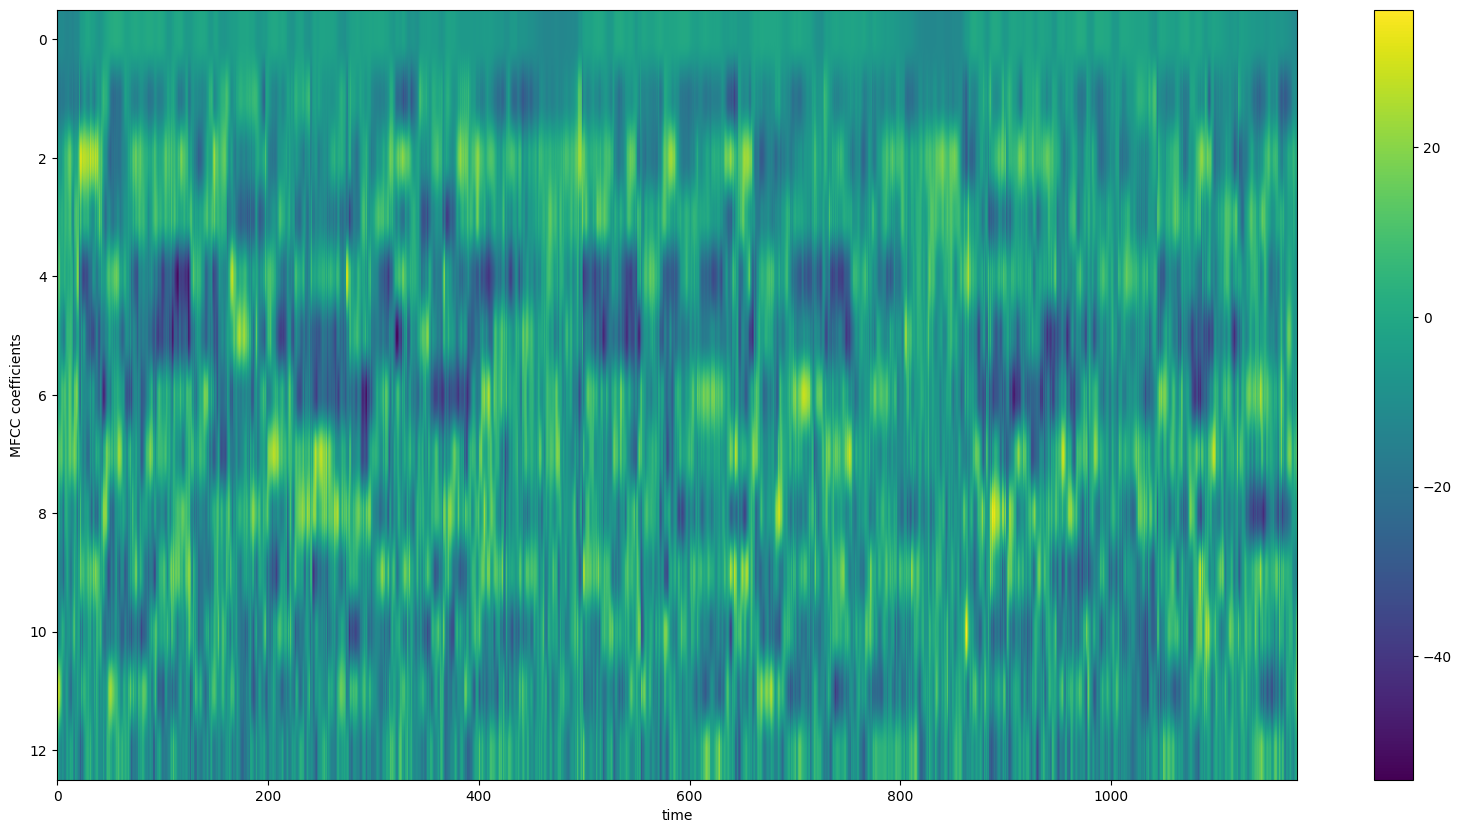

In [167]:
plt.figure(figsize=(20,10))
plt.xlabel('time')
plt.ylabel('MFCC coefficients')
plt.imshow(np.transpose(MF),aspect='auto')
plt.colorbar()